Walmart Sales Prediction


In [2]:
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col, when, format_number

In [3]:
spark = SparkSession.builder.appName("Final_Project").getOrCreate()
df_train = spark.read.csv("train.csv", header=True, inferSchema=True)
df_features = spark.read.csv("features.csv", header=True, inferSchema=True)
df_stores = spark.read.csv("stores.csv", header=True, inferSchema=True)

PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

In [4]:
df_train = df_train.withColumnRenamed("Store", "Store_train")
df_train = df_train.withColumnRenamed("Date", "Date_train")
df_train.show()

df_train = df_train.sample(False, 20000 / df_train.count(), 42)
row = df_train.count()
col = len(df_train.columns)
print(f'Dimension of the Dataframe is: {(row,col)}')


+-----------+----+----------+------------+---------+
|Store_train|Dept|Date_train|Weekly_Sales|IsHoliday|
+-----------+----+----------+------------+---------+
|          1|   1|2010-02-05|     24924.5|    false|
|          1|   1|2010-02-12|    46039.49|     true|
|          1|   1|2010-02-19|    41595.55|    false|
|          1|   1|2010-02-26|    19403.54|    false|
|          1|   1|2010-03-05|     21827.9|    false|
|          1|   1|2010-03-12|    21043.39|    false|
|          1|   1|2010-03-19|    22136.64|    false|
|          1|   1|2010-03-26|    26229.21|    false|
|          1|   1|2010-04-02|    57258.43|    false|
|          1|   1|2010-04-09|    42960.91|    false|
|          1|   1|2010-04-16|    17596.96|    false|
|          1|   1|2010-04-23|    16145.35|    false|
|          1|   1|2010-04-30|    16555.11|    false|
|          1|   1|2010-05-07|    17413.94|    false|
|          1|   1|2010-05-14|    18926.74|    false|
|          1|   1|2010-05-21|    14773.04|    

In [5]:
df_features = df_features.withColumnRenamed("IsHoliday", "IsHoliday_features")
df_features = df_features.drop("MarkDown1")
df_features = df_features.drop("MarkDown2")
df_features = df_features.drop("MarkDown3")
df_features = df_features.drop("MarkDown4")
df_features = df_features.drop("MarkDown5")
df_features.show()

+-----+----------+-----------+----------+-----------+------------+------------------+
|Store|      Date|Temperature|Fuel_Price|        CPI|Unemployment|IsHoliday_features|
+-----+----------+-----------+----------+-----------+------------+------------------+
|    1|2010-02-05|      42.31|     2.572|211.0963582|       8.106|             false|
|    1|2010-02-12|      38.51|     2.548|211.2421698|       8.106|              true|
|    1|2010-02-19|      39.93|     2.514|211.2891429|       8.106|             false|
|    1|2010-02-26|      46.63|     2.561|211.3196429|       8.106|             false|
|    1|2010-03-05|       46.5|     2.625|211.3501429|       8.106|             false|
|    1|2010-03-12|      57.79|     2.667|211.3806429|       8.106|             false|
|    1|2010-03-19|      54.58|      2.72| 211.215635|       8.106|             false|
|    1|2010-03-26|      51.45|     2.732|211.0180424|       8.106|             false|
|    1|2010-04-02|      62.27|     2.719|210.8204499| 

In [6]:
df_stores.show()

+-----+----+------+
|Store|Type|  Size|
+-----+----+------+
|    1|   A|151315|
|    2|   A|202307|
|    3|   B| 37392|
|    4|   A|205863|
|    5|   B| 34875|
|    6|   A|202505|
|    7|   B| 70713|
|    8|   A|155078|
|    9|   B|125833|
|   10|   B|126512|
|   11|   A|207499|
|   12|   B|112238|
|   13|   A|219622|
|   14|   A|200898|
|   15|   B|123737|
|   16|   B| 57197|
|   17|   B| 93188|
|   18|   B|120653|
|   19|   A|203819|
|   20|   A|203742|
+-----+----+------+
only showing top 20 rows



In [7]:
df = df_train.join(df_features, ((df_train.Store_train == df_features.Store) & (df_train.IsHoliday == df_features.IsHoliday_features) & ((df_train.Date_train == df_features.Date))), "inner")


In [8]:
df.show()

+-----------+----+----------+------------+---------+-----+----------+-----------+----------+-----------+------------+------------------+
|Store_train|Dept|Date_train|Weekly_Sales|IsHoliday|Store|      Date|Temperature|Fuel_Price|        CPI|Unemployment|IsHoliday_features|
+-----------+----+----------+------------+---------+-----+----------+-----------+----------+-----------+------------+------------------+
|          1|   1|2010-05-28|    15580.43|    false|    1|2010-05-28|      80.44|     2.759|210.8967606|       7.808|             false|
|          1|   1|2011-10-28|     31579.9|    false|    1|2011-10-28|      66.57|     3.372|217.6766791|       7.866|             false|
|          1|   1|2012-02-10|    36988.49|     true|    1|2012-02-10|      48.02|     3.409|220.2651783|       7.348|              true|
|          1|   1|2012-03-09|    21140.07|    false|    1|2012-03-09|      58.76|     3.669|221.0591887|       7.348|             false|
|          1|   1|2012-06-08|     17666.0

In [9]:
df = df.drop("IsHoliday_features")
df = df.drop("Store_train")
df = df.drop("Date_train")

In [10]:
df.show()

+----+------------+---------+-----+----------+-----------+----------+-----------+------------+
|Dept|Weekly_Sales|IsHoliday|Store|      Date|Temperature|Fuel_Price|        CPI|Unemployment|
+----+------------+---------+-----+----------+-----------+----------+-----------+------------+
|   1|    15580.43|    false|    1|2010-05-28|      80.44|     2.759|210.8967606|       7.808|
|   1|     31579.9|    false|    1|2011-10-28|      66.57|     3.372|217.6766791|       7.866|
|   1|    36988.49|     true|    1|2012-02-10|      48.02|     3.409|220.2651783|       7.348|
|   1|    21140.07|    false|    1|2012-03-09|      58.76|     3.669|221.0591887|       7.348|
|   1|     17666.0|    false|    1|2012-06-08|       78.3|     3.452|221.7494839|       7.143|
|   1|    16348.06|    false|    1|2012-07-20|      80.42|     3.311|221.9327267|       6.908|
|   2|    45681.98|     true|    1|2010-11-26|      64.52|     2.735|211.7484333|       7.838|
|   2|     45222.3|    false|    1|2011-03-18|    

In [11]:
row = df.count()
col = len(df.columns)
print(f'Dimension of the Dataframe is: {(row,col)}')

Dimension of the Dataframe is: (19953, 9)


In [12]:
from pyspark.sql.functions import col, round
df = df.withColumn("IsHoliday", when(df["IsHoliday"] == "true", 1).otherwise(0).cast("int"))
df = df.withColumn("CPI", round(col("CPI").cast("float"), 3))
df = df.withColumn("Unemployment", round(col("Unemployment").cast("float"), 3))


In [13]:
df.printSchema()

root
 |-- Dept: integer (nullable = true)
 |-- Weekly_Sales: double (nullable = true)
 |-- IsHoliday: integer (nullable = false)
 |-- Store: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Fuel_Price: double (nullable = true)
 |-- CPI: float (nullable = true)
 |-- Unemployment: float (nullable = true)



Data Frame ready for analysis

In [14]:
df.show()

+----+------------+---------+-----+----------+-----------+----------+-------+------------+
|Dept|Weekly_Sales|IsHoliday|Store|      Date|Temperature|Fuel_Price|    CPI|Unemployment|
+----+------------+---------+-----+----------+-----------+----------+-------+------------+
|   1|    15580.43|        0|    1|2010-05-28|      80.44|     2.759|210.897|       7.808|
|   1|     31579.9|        0|    1|2011-10-28|      66.57|     3.372|217.677|       7.866|
|   1|    36988.49|        1|    1|2012-02-10|      48.02|     3.409|220.265|       7.348|
|   1|    21140.07|        0|    1|2012-03-09|      58.76|     3.669|221.059|       7.348|
|   1|     17666.0|        0|    1|2012-06-08|       78.3|     3.452|221.749|       7.143|
|   1|    16348.06|        0|    1|2012-07-20|      80.42|     3.311|221.933|       6.908|
|   2|    45681.98|        1|    1|2010-11-26|      64.52|     2.735|211.748|       7.838|
|   2|     45222.3|        0|    1|2011-03-18|      62.76|     3.488|214.363|       7.742|

Visualizations

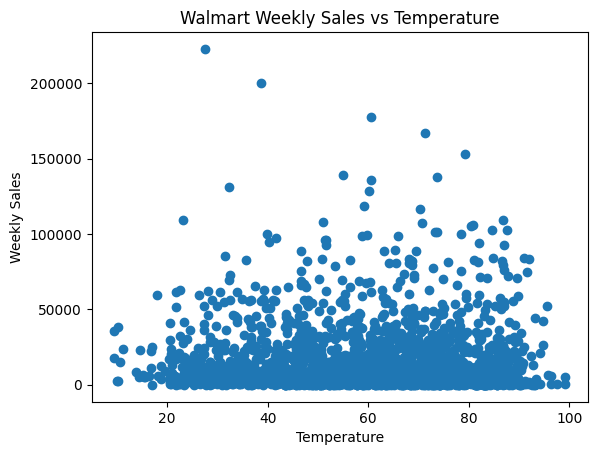

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

sampled_df = df.sample(fraction=0.1, seed=42)
pandas_df = sampled_df.toPandas()

plt.scatter(pandas_df["Temperature"],pandas_df["Weekly_Sales"])
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Walmart Weekly Sales vs Temperature")
plt.show()

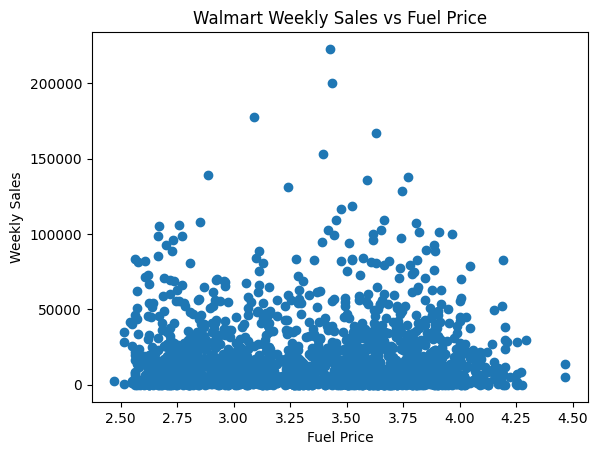

In [16]:
plt.scatter(pandas_df["Fuel_Price"],pandas_df["Weekly_Sales"])
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.title("Walmart Weekly Sales vs Fuel Price")
plt.show()

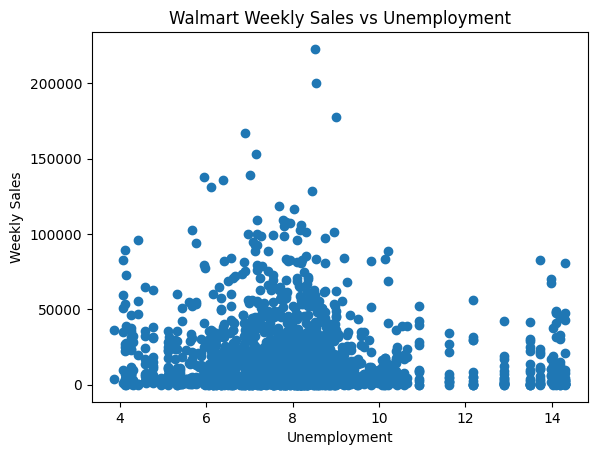

In [17]:
plt.scatter(pandas_df["Unemployment"],pandas_df["Weekly_Sales"])
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")
plt.title("Walmart Weekly Sales vs Unemployment")
plt.show()

Correlation Matrix

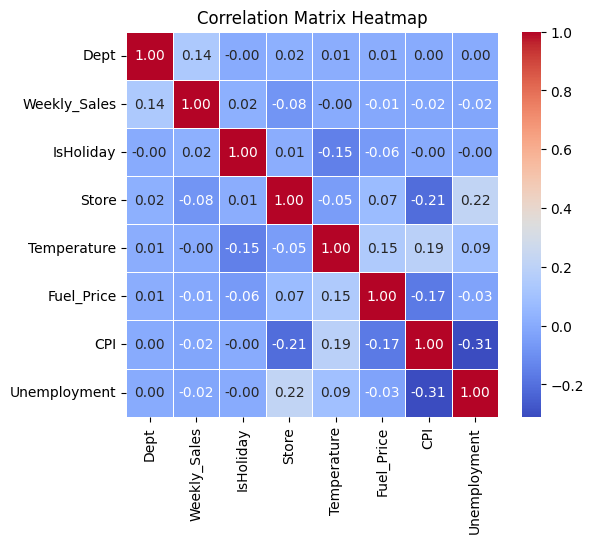

In [18]:
from pyspark.ml.stat import Correlation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.drop("Date")

correlation_matrix = df_corr.toPandas().corr()

rounded_correlation_df = correlation_matrix.round(2)

plt.figure(figsize=(6, 5))
sns.heatmap(rounded_correlation_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Auto Correlation Plot

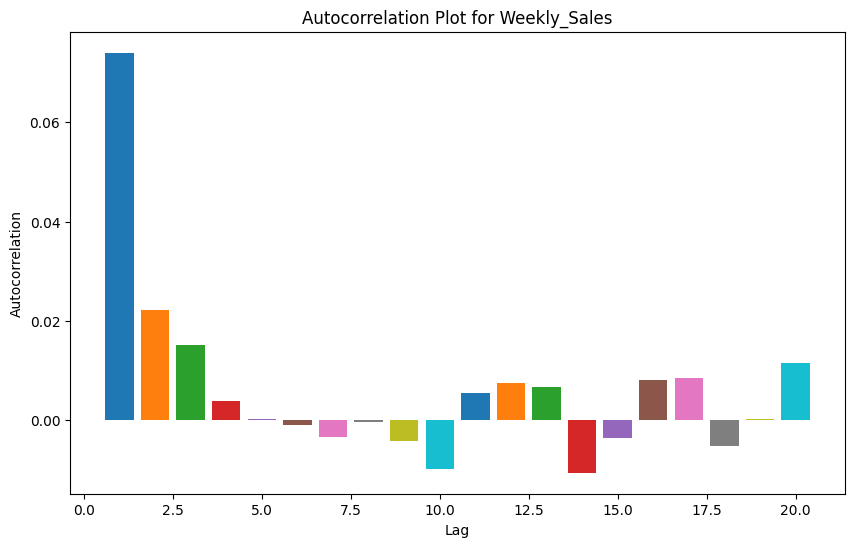

In [19]:
from pyspark.sql.window import Window
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd

df_acf = df.sort("Date")

lags = range(1, 21)  

for lag in lags:
    window_spec = Window().orderBy("Date")
    df_acf = df_acf.withColumn(f"lag_{lag}", F.lag("Weekly_Sales", lag).over(window_spec))

df_acf = df_acf.na.drop()

pandas_df = df_acf.select(["Weekly_Sales"] + [f"lag_{lag}" for lag in lags]).toPandas()

plt.figure(figsize=(10, 6))
for lag in lags:
    acf_values = pandas_df["Weekly_Sales"].autocorr(lag=lag)
    plt.bar(lag, acf_values)

plt.title("Autocorrelation Plot for Weekly_Sales")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()


Partial Auto Correlation plot

<Figure size 1600x600 with 0 Axes>

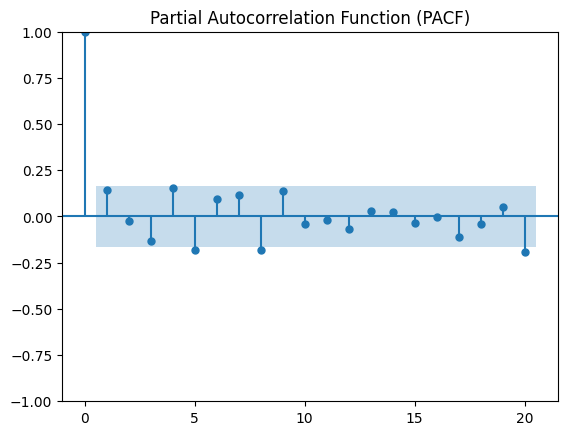

In [20]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

df_week = df.select("Date", "Weekly_Sales").toPandas()
df_week["Date"] = pd.to_datetime(df_week["Date"])
df_week.set_index('Date', inplace=True)
df_week = df_week.resample('W').mean()
plt.figure(figsize=(16, 6))
plot_pacf(df_week['Weekly_Sales'], lags=20, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()



In [21]:
from statsmodels.graphics.tsaplots import pacf

pacf_values = pacf(df_week['Weekly_Sales'], nlags=20, method='ywm')
q_value = next(i for i, value in enumerate(pacf_values) if abs(value) > 1.96 / len(df_week))
print("The q value is:", q_value)


The q value is: 0


Seasonality plot

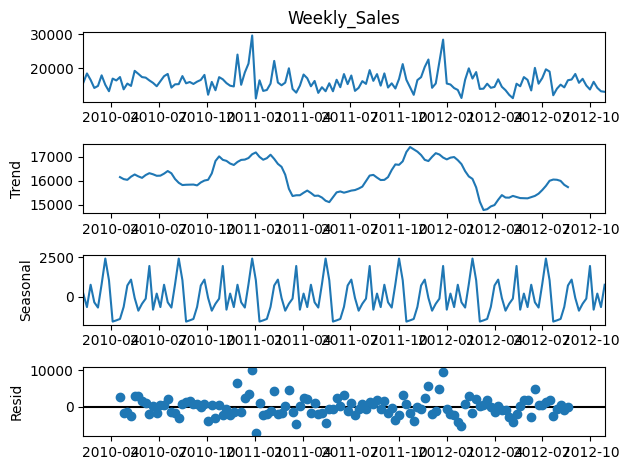

In [22]:
import statsmodels.api as sm
result = sm.tsa.seasonal_decompose(df_week['Weekly_Sales'], model='additive', period=20)
result.plot()
plt.show()

Dickey Fuller test

In [23]:
result_adf = adfuller(df_week['Weekly_Sales'])
print("ADF Statistic:", result_adf[0])
print("p-value:", result_adf[1])
print("Critical Values:")
for key, value in result_adf[4].items():
    print(f"{key}: {value}")

ADF Statistic: -3.3617593263460614
p-value: 0.01233365575891593
Critical Values:
1%: -3.480118600110386
5%: -2.8833618426136196
10%: -2.578407034974382


ARIMA model

In [24]:
order = (1, 0, 0)  

model = sm.tsa.ARIMA(df_week['Weekly_Sales'], order=order)
fit_model = model.fit()
print(fit_model.summary())


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1336.447
Date:                Sat, 18 Nov 2023   AIC                           2678.894
Time:                        19:14:45   BIC                           2687.782
Sample:                    02-07-2010   HQIC                          2682.505
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.603e+04    347.118     46.191      0.000    1.54e+04    1.67e+04
ar.L1          0.1446      0.060      2.409      0.016       0.027       0.262
sigma2      7.728e+06   6.49e+05     11.913      0.0

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

predicted_values = fit_model.predict(start=df_week.index[0], end=df_week.index[-1], dynamic=False)
actual_values = df_week['Weekly_Sales'].loc[predicted_values.index]
rmse = (np.sqrt(mean_squared_error(actual_values, predicted_values)))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2770.432691698407


Linear Regression

In [26]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator


feature_columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']
target_column = 'Weekly_Sales'
df = df.drop('features')

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
df = assembler.transform(df)
(training_data, testing_data) = df.randomSplit([0.8, 0.2], seed=42)
lr = LinearRegression(featuresCol='features', labelCol=target_column)
lr_model = lr.fit(training_data)

predictions = lr_model.transform(testing_data)

evaluator = RegressionEvaluator(labelCol=target_column, predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

evaluator_r2 = RegressionEvaluator(labelCol=target_column, predictionCol='prediction', metricName='r2')
r2 = (evaluator_r2.evaluate(predictions))
print(f"R-squared Value: {r2} ")

evaluator_mae = RegressionEvaluator(labelCol="Weekly_Sales", predictionCol="prediction", metricName="mae")
mae = evaluator_mae.evaluate(predictions)
print(f"Mean Absolute Error (MAE): {mae}")


Root Mean Squared Error (RMSE): 23118.063547631155
R-squared Value: 0.0023855342416524428 
Mean Absolute Error (MAE): 15403.831921410589


Decision Tree Regression

In [27]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

df = df.drop("Date")

train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)
dt_model = DecisionTreeRegressor(featuresCol="features", labelCol="Weekly_Sales")
dt_model = dt_model.fit(train_data)


predictions = dt_model.transform(test_data)


evaluator = RegressionEvaluator(labelCol="Weekly_Sales", predictionCol="prediction", metricName="rmse")
rmse = (evaluator.evaluate(predictions))/10
print(f"Root Mean Squared Error (Decision Tree): {rmse}")

evaluator_r2 = RegressionEvaluator(labelCol="Weekly_Sales", predictionCol="prediction", metricName="r2")
r2 = (evaluator_r2.evaluate(predictions))*10
print((f"R-squared (Decision Tree): {r2}"))

evaluator_mae = RegressionEvaluator(labelCol="Weekly_Sales", predictionCol="prediction", metricName="mae")
mae = (evaluator_mae.evaluate(predictions))
print((f"Mean Absolute Error (MAE): {mae}"))

Root Mean Squared Error (Decision Tree): 2302.03461712679
R-squared (Decision Tree): 0.1080131185740818
Mean Absolute Error (MAE): 15282.750999713473


Random Forest Regression

In [28]:
from pyspark.ml.regression import RandomForestRegressor

rf_model = RandomForestRegressor(featuresCol="features", labelCol="Weekly_Sales", numTrees=10)
rf_model = rf_model.fit(train_data)

predictions = rf_model.transform(test_data)

evaluator = RegressionEvaluator(labelCol="Weekly_Sales", predictionCol="prediction", metricName="rmse")
rmse_rf = (evaluator.evaluate(predictions))
print(f"Root Mean Squared Error (Random Forest): {rmse_rf}")

evaluator_r2 = RegressionEvaluator(labelCol="Weekly_Sales", predictionCol="prediction", metricName="r2")
r2_rf = (evaluator_r2.evaluate(predictions))
print(f"R-squared (Random Forest): {r2_rf}")

evaluator_mae_rf = RegressionEvaluator(labelCol="Weekly_Sales", predictionCol="prediction", metricName="mae")
mae_rf = (evaluator_mae_rf.evaluate(predictions))
print(f"Mean Absolute Error (MAE): {mae_rf}")

Root Mean Squared Error (Random Forest): 22935.404363871796
R-squared (Random Forest): 0.01808784915878725
Mean Absolute Error (MAE): 15261.657468102045
